In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.misc

# Plot ROIs

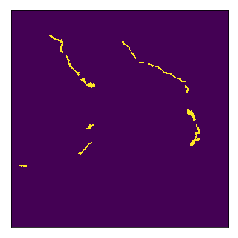

In [2]:
directory = 'D:/analysis-diego-suite2p/IBL/'

stat_path = directory+'2019-07-23_FOV1-t002-t003/suite2p/plane0/stat.npy'
ops_path = directory+'2019-07-23_FOV1-t002-t003/suite2p/plane0/ops.npy'
iscell_path = directory+'2019-07-23_FOV1-t002-t003/suite2p/plane0/iscell.npy'

stat = np.load(stat_path)
ops = np.load(ops_path).item()
iscell = np.load(iscell_path)
im = np.zeros((ops['Ly'], ops['Lx']))
for n in range(0,len(stat)):
    if iscell[n,0] == 1:
      ypix = stat[n]['ypix']#[~stat[n]['overlap']]
      xpix = stat[n]['xpix']#[~stat[n]['overlap']]
      im[ypix,xpix] = 255
plt.xticks([])
plt.yticks([])
plt.imshow(im)
#plt.gray()
plt.show()

# Extract contour of ROIs

In [47]:
im_contour = np.ones((ops['Ly'], ops['Lx']))*255
for ypix in range(1,im.shape[0]-1):
    for xpix in range(1,im.shape[1]-1):
        a=im[ypix,xpix+1]
        b=im[ypix+1,xpix]
        c=im[ypix+1,xpix+1]
        d=im[ypix,xpix-1]
        e=im[ypix-1,xpix]
        f=im[ypix+1,xpix-1]
        g=im[ypix-1,xpix+1]
        h=im[ypix-1,xpix-1]
        if im[ypix,xpix] == 0 and (a ==255 or b ==255 or c ==255 or d ==255 or e ==255 or f ==255 or g ==255 or h == 255).any():
            im_contour[ypix,xpix] = 0
        else
            

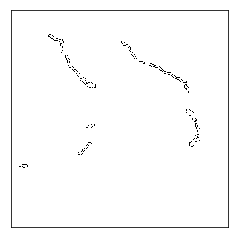

In [48]:
plt.imshow(im_contour)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()


In [67]:
scipy.misc.imsave('outfile.jpg', im)

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [68]:
img = Image.open('outfile.jpg')
img = img.convert("RGBA")
datas = img.getdata()